# XGBoost in Python

In this project, we will use XGBoost to build a collection of boosted trees, and use continous and categorical data from the IBM Base Samples to predict whether or not a customer will stop using a company's service. Data is provided in the repository.

## Importing required libraries

In [4]:
import pandas as pd #load and manipulate data and for One-Hot Encoding
import numpy as np #numerical calculations
import xgboost as xgb #XGBoost Model
from sklearn.model_selection import train_test_split #split data into training and testing sets
from sklearn.metrics import balanced_accuracy_score,roc_auc_score, make_scorer #For scoring during evaluation
from sklearn.model_selection import GridSearchCV #Optimization and cross validation
from sklearn.metrics import confusion_matrix, plot_confusion_matrix #plotting a confusion matrix
import warnings #to hide future warnings

warnings.filterwarnings("ignore")

## Load dataset
We load in a dataset from the IBM Base Samples. We are going to use Telco Churn Dataset. 
https://developer.ibm.com/data/

In [5]:
df=pd.read_excel('Telco_customer_churn.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [6]:
df.shape

(7043, 33)

Dataset has 7043 rows x 24 columns.

In [7]:
df[df['Churn Label']=='No']

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
1869,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,27,3964,NaN
1870,5575-GNVDE,1,United States,California,Los Angeles,90002,"33.949255, -118.246978",33.949255,-118.246978,Male,...,One year,No,Mailed check,56.95,1889.5,No,0,61,3441,NaN
1871,7795-CFOCW,1,United States,California,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,Male,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,66,4307,NaN
1872,1452-KIOVK,1,United States,California,Los Angeles,90007,"34.027337, -118.28515",34.027337,-118.285150,Male,...,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0,43,4459,NaN
1873,6713-OKOMC,1,United States,California,Los Angeles,90008,"34.008293, -118.346766",34.008293,-118.346766,Female,...,Month-to-month,No,Mailed check,29.75,301.9,No,0,51,2013,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


Looking at dataset, the last 4 columns contain exit interview information and should not be used for prediction. They will give model perfect prediction ability because only who left the company has answers here. Thus, we drop those columns.

In [8]:
df.drop(['Churn Label','Churn Score','CLTV','Churn Reason'],axis=1,inplace=True)
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [9]:
df['Count'].unique()

array([1], dtype=int64)

In [10]:
df['Country'].unique()

array(['United States'], dtype=object)

In [11]:
df['State'].unique()

array(['California'], dtype=object)

'Count', 'Country', 'State' columns only contain a single value. They are not useful for classification. 'Latitude' and 'Longtitude' values are merged in 'Lat Long' column. Since, these columns do not make sense in the prediction, we drop them too.

In [12]:
df.drop(['Count','Country','State','CustomerID','Lat Long'],axis=1,inplace=True)
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


XGBoost does not care if we have whitespaces in column names but we cannot have any whitespace if want to draw a tree. So, let's replace whitespaces with an underscore '_'.

In [13]:
df['City'].replace(' ','_',regex=True,inplace=True)

In [14]:
df['City']

0        Los_Angeles
1        Los_Angeles
2        Los_Angeles
3        Los_Angeles
4        Los_Angeles
            ...     
7038         Landers
7039        Adelanto
7040           Amboy
7041    Angelus_Oaks
7042    Apple_Valley
Name: City, Length: 7043, dtype: object

In [15]:
df.columns=df.columns.str.replace(' ','_')
df.columns

Index(['City', 'Zip_Code', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges', 'Churn_Value'],
      dtype='object')

# Identifying Missing Data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip_Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior_Citizen     7043 non-null   object 
 6   Partner            7043 non-null   object 
 7   Dependents         7043 non-null   object 
 8   Tenure_Months      7043 non-null   int64  
 9   Phone_Service      7043 non-null   object 
 10  Multiple_Lines     7043 non-null   object 
 11  Internet_Service   7043 non-null   object 
 12  Online_Security    7043 non-null   object 
 13  Online_Backup      7043 non-null   object 
 14  Device_Protection  7043 non-null   object 
 15  Tech_Support       7043 non-null   object 
 16  Streaming_TV       7043 

In [17]:
df['Phone_Service'].unique()

array(['Yes', 'No'], dtype=object)

We should check each column to see if data is appropriate for corresponding datatype. 'Total_Charges' column should be in 'float' dtype.

In [18]:
df['Total_Charges'].unique()

array([108.15, 151.65, 820.5, ..., 7362.9, 346.45, 6844.5], dtype=object)

If we try to change the datatype of 'Total_Charges' column to numberic datatype, we will get error because of missing data.

In [19]:
#df['Total_Charges']=pd.to_numeric(df['Total_Charges'])

Let's replace whitespaces with 0s , because XGBoost has unique feature that it identifies missing values. However, we should the number of missing values. If it is a lot, we should fill them or handle in another way. If it is not, we can just set them to 0.

In [20]:
len(df[df['Total_Charges']==' '])

11

11 rows have missing data. Since we have few missing values, we can fill them with 0.

In [21]:
df[df['Total_Charges']==' ']

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [22]:
df.loc[(df['Total_Charges']==' '),'Total_Charges']=0

Let's see 'Total_Charges' column is correct by checking 'Tenure_Months' column is also 0. 

In [23]:
df.loc[df['Tenure_Months']==0]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,0


Now we can change the datatype of 'Total_Charges' to numeric datatype.

In [24]:
df['Total_Charges']=pd.to_numeric(df['Total_Charges'])

In [25]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Value            int64
dtype: object

Let's replace whitespaces in dataframe with an underscore '_'.

In [26]:
df.replace(' ','_',regex=True,inplace=True)
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,1


In [27]:
cat_columns=[column for column in df.select_dtypes('object')]
cat_columns

['City',
 'Gender',
 'Senior_Citizen',
 'Partner',
 'Dependents',
 'Phone_Service',
 'Multiple_Lines',
 'Internet_Service',
 'Online_Security',
 'Online_Backup',
 'Device_Protection',
 'Tech_Support',
 'Streaming_TV',
 'Streaming_Movies',
 'Contract',
 'Paperless_Billing',
 'Payment_Method']

We need dependent and independent features for train_test_split.

In [28]:
X=df.drop('Churn_Value',axis=1).copy()
X.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30


In [29]:
y=df['Churn_Value'].copy()

# Handling Categorical Columns

We will use the pandas function to convert categorical columns into multiple columns of binary values. If we try to convert 'Payment_Method', it will look like this:

In [30]:
pd.get_dummies(X,columns=['Payment_Method']).head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Monthly_Charges,Total_Charges,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,Month-to-month,Yes,53.85,108.15,0,0,0,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,Month-to-month,Yes,70.70,151.65,0,0,1,0
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,Yes,Month-to-month,Yes,99.65,820.50,0,0,1,0
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Month-to-month,Yes,104.80,3046.05,0,0,1,0
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,Month-to-month,Yes,103.70,5036.30,1,0,0,0


In [31]:
X.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30


Now let's convert all categorical columns.

In [32]:
X_encoded=pd.get_dummies(X,columns=cat_columns)
X_encoded.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33.964131,-118.272783,2,53.85,108.15,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,90005,34.059281,-118.307420,2,70.70,151.65,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,90006,34.048013,-118.293953,8,99.65,820.50,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,90010,34.062125,-118.315709,28,104.80,3046.05,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
4,90015,34.039224,-118.266293,49,103.70,5036.30,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0


# XGBoost Model

In [33]:
y.unique()

array([1, 0], dtype=int64)

We have values of 1 and 0 in the column that we will predict. Let's see how imbalanced is our data.

In [34]:
sum(y)/len(y)

0.2653698707936959

We see that people who have left is 26.5% of all people. 

We need to use stratification in order to maintain the same percentage of people who left the company in both training and testing set.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, stratify=y)

In [36]:
sum(y_train)/len(y_train)

0.2654297614539947

In [37]:
sum(y_test)/len(y_test)

0.26519023282226006

The number of people who left is equally shared in both training and test sets.

Now we can build XGBoost model...

In [38]:
clf_xgb=xgb.XGBClassifier(objective='binary:logistic',missing=0,seed=42)
clf_xgb.fit(X_train, y_train,
           verbose=True,
           early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.64036
[1]	validation_0-aucpr:0.64414
[2]	validation_0-aucpr:0.65129
[3]	validation_0-aucpr:0.65054
[4]	validation_0-aucpr:0.65323
[5]	validation_0-aucpr:0.64855
[6]	validation_0-aucpr:0.65460
[7]	validation_0-aucpr:0.65895
[8]	validation_0-aucpr:0.65746
[9]	validation_0-aucpr:0.65851
[10]	validation_0-aucpr:0.66217
[11]	validation_0-aucpr:0.66528
[12]	validation_0-aucpr:0.66322
[13]	validation_0-aucpr:0.66310
[14]	validation_0-aucpr:0.66001
[15]	validation_0-aucpr:0.66028
[16]	validation_0-aucpr:0.65781
[17]	validation_0-aucpr:0.65590
[18]	validation_0-aucpr:0.65735
[19]	validation_0-aucpr:0.65857
[20]	validation_0-aucpr:0.65896
[21]	validation_0-aucpr:0.65961


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=0, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

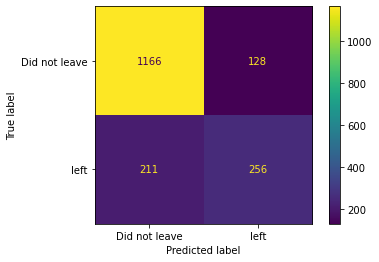

In [39]:
plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['Did not leave','left'])

Our model classified correctly most of the people who did not leave but as our data was imbalanced, the model could not classify most of the people who left the company. Overall, our model is not amazing, thus let's improve it by optimizing parameters.

# Optimization by using GridSearch and Cross Validation

The first parameters in param_grid1 was tested in our model, then we choose optimal parameters of it according to the output.

In [53]:
param_grid1={
    'max_depth':[3,4,5],
    'learning_rate':[0.1,0.01,0.05],
    'gamma':[0,0.25,1],
    'reg_lambda':[0,1,10],
    'scale_pos_weight':[1,2,3,5]
}

# Output: {'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 10,'scale_pos_weight': 1}
# In the next param_grid, we choose optimal parameter values with respect to the param_gird1.

param_grid2={
    'max_depth':[4],
    'learning_rate':[0.1,0.5,1],
    'gamma':[0,0.25,1],
    'reg_lambda':[10,20,100],
    'scale_pos_weight':[2]
}

optimal_params = GridSearchCV(
    estimator = xgb.XGBClassifier(objective='binary:logistic',
                              seed=42,
                              subsample=0.9,
                              colsample_bytree=0.5),
    param_grid=param_grid2,
    scoring='roc_auc',
    verbose=2,
    n_jobs=10,
    cv=3
)

optimal_params.fit(X_train,
                  y_train,
                   verbose=False,
                  early_stopping_rounds=10,
                  eval_metric='aucpr',
                   eval_set=[(X_test,y_test)])

print(optimal_params.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 10, 'scale_pos_weight': 2}


# Building, Evaluating and Drawing Optimized XGBoost Model

In [40]:
clf_xgb=xgb.XGBClassifier(seed=42,
                         objective='binary:logistic',
                         gamma=0,
                         learning_rate=0.1,
                          max_depth=4,
                          reg_lambda=10,
                          scale_pos_weight=2,
                          subsample=0.9,
                          colsample_bytree=0.5)


clf_xgb.fit(X_train, y_train,
           verbose=True,
           early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.57902
[1]	validation_0-aucpr:0.60008
[2]	validation_0-aucpr:0.62897
[3]	validation_0-aucpr:0.63142
[4]	validation_0-aucpr:0.63429
[5]	validation_0-aucpr:0.63391
[6]	validation_0-aucpr:0.63188
[7]	validation_0-aucpr:0.64907
[8]	validation_0-aucpr:0.64977
[9]	validation_0-aucpr:0.64942
[10]	validation_0-aucpr:0.65247
[11]	validation_0-aucpr:0.65272
[12]	validation_0-aucpr:0.65431
[13]	validation_0-aucpr:0.65463
[14]	validation_0-aucpr:0.65770
[15]	validation_0-aucpr:0.65936
[16]	validation_0-aucpr:0.65691
[17]	validation_0-aucpr:0.65570
[18]	validation_0-aucpr:0.65290
[19]	validation_0-aucpr:0.65539
[20]	validation_0-aucpr:0.65458
[21]	validation_0-aucpr:0.65384
[22]	validation_0-aucpr:0.65391
[23]	validation_0-aucpr:0.65212
[24]	validation_0-aucpr:0.65233
[25]	validation_0-aucpr:0.65647


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=2, seed=42,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

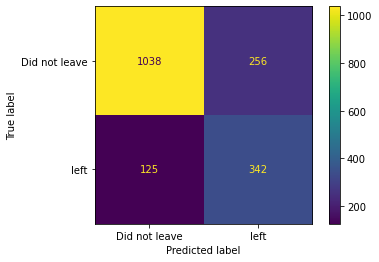

In [41]:
plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['Did not leave','left'])

In conclusion, of the 1294 people that did not leave the company, 1038 (80%) were correctly classified, and of the 467 people that left the company, 342 (#73%) were identified by the model. Before the optimization, it was 90% prediction for the people who did not leave the company, and 45% for the people who left the company.

[21:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
weight:  {'Tech_Support_No': 1, 'Contract_Two_year': 1, 'Internet_Service_Fiber_optic': 1, 'Tenure_Months': 5, 'Latitude': 1, 'City_Santa_Monica': 1, 'Internet_Service_DSL': 2, 'Monthly_Charges': 1, 'Multiple_Lines_No_phone_service': 1}
gain:  {'Tech_Support_No': 864.048035, 'Contract_Two_year': 134.445435, 'Internet_Service_Fiber_optic': 92.3444824, 'Tenure_Months': 97.50479732, 'Latitude': 3.043396, 'City_Santa_Monica': 2.10400391, 'Internet_Service_DSL': 81.34566135, 'Monthly_Charges': 1.73220825, 'Multiple_Lines_No_phone_service': 7.95378113}
cover:  {'Tech_Support_No': 1506.75, 'Contract_Two_year': 674.0, 'Internet_Service_Fiber_optic': 421.25, 'Tenure_Months': 344.55, 'Latitu

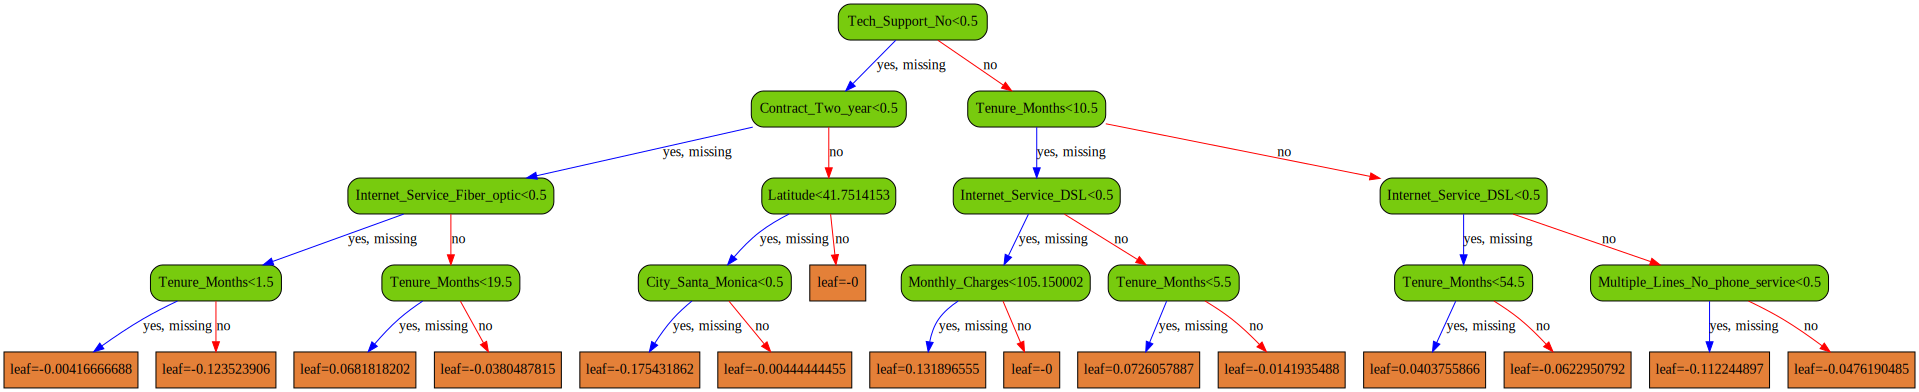

In [42]:
clf_xgb=xgb.XGBClassifier(seed=42,
                         objective='binary:logistic',
                         gamma=0,
                         learning_rate=0.1,
                          max_depth=4,
                          reg_lambda=10,
                          scale_pos_weight=2,
                          subsample=0.9,
                          colsample_bytree=0.5,
                         n_estimators=1)


clf_xgb.fit(X_train, y_train)


bst=clf_xgb.get_booster()

for importance_type in ('weight','gain','cover','total_gain','total_cover'):
    print('%s: '% importance_type, bst.get_score(importance_type=importance_type))

node_params= {'shape':'box',
             'style':'filled,rounded',
             'fillcolor':'#78cbe'}
leaf_params={'shape':'box',
            'style':'filled',
            'fillcolor':'#e48038'}

xgb.to_graphviz(clf_xgb, num_trees=0, size='10,10',
               condition_node_params=node_params,
               leaf_node_params=leaf_params)